In [ ]:
#importing all the required libraries
import numpy as np
import operator
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#loading the file from Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#changing the directory to the location of the file.
os.chdir('/content/drive/Shared drives/MAJOR RESEARCH PROJECT/PROBLEM STATEMENT AND DATASET')

In [ ]:
filename = 'cardiovascular.csv' #setting the file name to a variable.

In [ ]:
df = pd.read_csv(filename) #reading the csv file in to a dataframe.

In [ ]:
df.head(2).transpose() #viewing the first two rows in the dataset in transpose view

,0,1
id,0.0,1.0
age,18393.0,20228.0
gender,2.0,1.0
height,168.0,156.0
weight,62.0,85.0
ap_hi,110.0,140.0
ap_lo,80.0,90.0
cholesterol,1.0,3.0
gluc,1.0,1.0
smoke,0.0,0.0


In [ ]:
y = df['cardio'] #target feature in the dataset to variable y

In [ ]:
to_drop = ['id'] #loading the features to drop in to a dataset
df.drop(to_drop, inplace=True, axis=1)


In [ ]:
#checking for any null values
df.isnull().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#find columns with null values
is_NaN_cells =  df.isnull()
columns_has_NaN = is_NaN_cells.any(axis=0)
columns_with_NaN =df[[col for col,value in columns_has_NaN.items() if value == True]]

print(columns_with_NaN)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[70000 rows x 0 columns]


In [ ]:
#find rows with Null Values
is_NaN_cells =  df.isnull()
row_has_NaN = is_NaN_cells.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)


Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
# Any missing values
print(df.isnull().values.any())

False


In [ ]:
df.columns #checking the columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
df.shape #shape before dropping the duplicates

(70000, 12)

In [ ]:
df.drop_duplicates(inplace=True) # dropping the duplicates in the dataset

In [ ]:
df.shape #shape after dropping the duplicates

(69976, 12)

In [ ]:
df.dropna(thresh=int(df.shape[0] * .9), axis=1) #drop any thing with 90% of mising values.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Normalising the data
df['age'] = df['age']/365
np.round(df['age'],2)
df['height'] = df['height']/100
np.round(df['height'],2)

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 69976, dtype: float64

# Experimentation and Results 

In [ ]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

In [ ]:
vif.round(1)

,VIF Factor,features
0,58.0,age
1,11.8,gender
2,100.5,height
3,31.9,weight
4,1.7,ap_hi
5,1.3,ap_lo
6,6.7,cholesterol
7,7.0,gluc
8,1.4,smoke
9,1.2,alco


From the above it is clear that no feature is having same VIF value and so we need not drop any feature.

https://etav.github.io/python/vif_factor_python.html

In [ ]:
from sklearn.model_selection import train_test_split
y = df["cardio"]
df_bckup = df
X = df.drop(['cardio'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install keras tensorflow

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers


#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(11,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()




Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 11)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_70 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_71 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_72 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_73 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_74 (Dense)             (None, 1)               

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#history = model.fit(X_train, y_train, epochs=1000, batch_size=1,callbacks=[es])
history = model.fit(X_train, y_train, batch_size = 1,
        epochs=1000, verbose=1,validation_data=(X_vali, y_vali),callbacks=[es])

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/1000
42194/42194 [==============================] - 52s 1ms/step - loss: 0.6672 - accuracy: 0.6057 - val_loss: 0.6156 - val_accuracy: 0.6906
Epoch 2/1000
42194/42194 [==============================] - 49s 1ms/step - loss: 0.6147 - accuracy: 0.6781 - val_loss: 0.5875 - val_accuracy: 0.6974
Epoch 3/1000
42194/42194 [==============================] - 49s 1ms/step - loss: 0.5921 - accuracy: 0.6964 - val_loss: 0.5507 - val_accuracy: 0.7368
Epoch 4/1000
42194/42194 [==============================] - 49s 1ms/step - loss: 0.5852 - accuracy: 0.7032 - val_loss: 0.5516 - val_accuracy: 0.7443
Epoch 5/1000
42194/42194 [==============================] - 50s 1ms/step - loss: 0.5774 - accuracy: 0.7073 - val_loss: 0.5472 - val_accuracy: 0.7332
Epoch 6/1000
42194/42194 [==============================] - 51s 1ms/step - loss: 0.5763 - accuracy: 0.7096 - val_loss: 0.5640 - val_accuracy: 0.7264
Epoch 7/1000
42194/42194 [==============================] - 51s 1ms/step - loss: 0.5720 - accuracy: 0.7138

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['loss']
val_acc = history.history['val_accuracy']

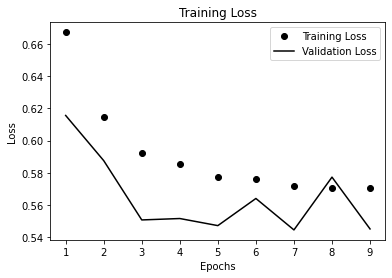

In [ ]:
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

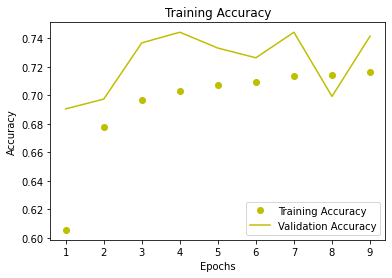

In [ ]:
plt.plot(epochs, history.history['accuracy'], 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix:", "\n", cm)

Confusion Matrix: 
 [[8707 2742]
 [3670 7974]]


In [ ]:
tpr, fpr, threshold = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-score:", auc_score)

AUC-score: 0.7857649905534496


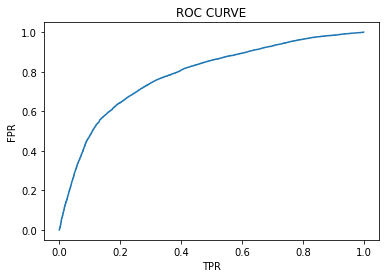

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(tpr, fpr)
plt.title("ROC CURVE")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.show()